# **Instalacion de libreria necesaria para el proyecto**
Libreria como Tensorflow, Keras, etc



In [30]:
!pip install tensorflow
!pip install keras
!pip install pillow
!pip install matplotlib
!pip install pandas
!pip install numpy as np
!pip install opencv-python
!pip install sklearn
!pip install openpyxl
!pip install scikit-learn
!pip install seaborn

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

# Acceso a nuestro Drive
comando para que colab tenga acceso a nuestro carpeta de drive

In [6]:
#from google.colab import drive
#drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

**Verificar si existe la carpeta en nuestro drive**

In [7]:
#!ls /archivo

'ls' is not recognized as an internal or external command,
operable program or batch file.


# Descomprimir Archivo ZIP y leer archivo
Se descomprimira los archivo zip donde estara nuestra data para entrenar el modelo. El zip tiene el modelo de parte de validacion y de entrenamiento.


---
Los archivo estara agrupada en una sola carperta, pero para deferencia de los otros, cada archivo tendra como nombre la fecha de que esta registrado en el mapa de calor.


In [4]:
import zipfile

local_path = 'C:/Users/yerso/OneDrive/Escritorio/archivo'


local_zip =  local_path + '/datos_clima.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

Mostrar las cantida de archivo que existe cada carpeta

In [5]:
import os
entrenamiento_dir = os.path.join('/tmp/Entrenamiento')
validez_dir = os.path.join('/tmp/Validacion')

print('total de carpeta entrenamiento:', len(os.listdir(entrenamiento_dir)))
print('total de carpeta validez:', len(os.listdir(validez_dir)))


total de carpeta entrenamiento: 744
total de carpeta validez: 56


Se vera la imagen original de los datos y el redimensionamiento que haremos para entrenar el modelo, en este caso sera 200 x 200

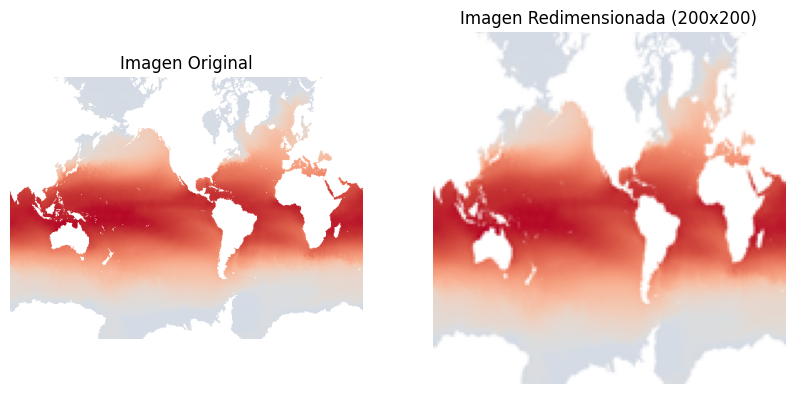

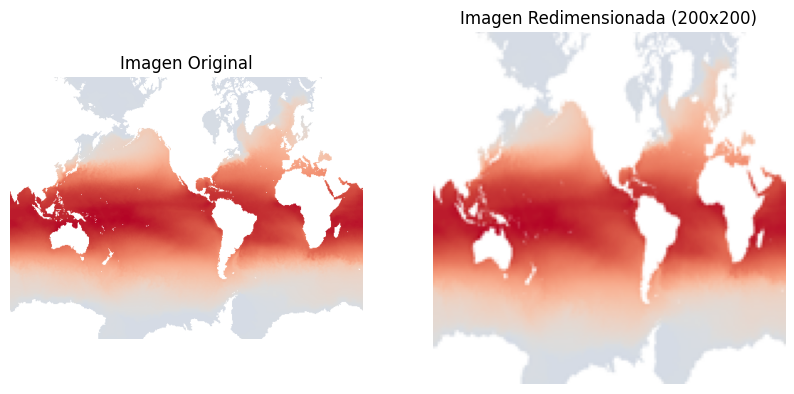

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
import os

img_path = '/tmp/Entrenamiento/'

img_files = os.listdir(img_path)[:2]
for img_file in img_files:
    full_img_path = os.path.join(img_path, img_file)

    # Abrir la imagen original
    img = Image.open(full_img_path)

    # Redimensionar la imagen a 150x150 píxeles
    img_resized = img.resize((150, 150))

    # Mostrar la imagen original
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Imagen Original')
    plt.axis('off')  # Ocultar los ejes

    # Mostrar la imagen redimensionada
    plt.subplot(1, 2, 2)
    plt.imshow(img_resized)
    plt.title('Imagen Redimensionada (200x200)')
    plt.axis('off')  # Ocultar los ejes

    plt.show()




# Leer archivo EXCEL y agrupar con el data set de imagenes


In [8]:
import pandas as pd

# Leer el archivo Excel
df = pd.read_excel(local_path + '/Clasificacion indice ICEN.xlsx', sheet_name='Hoja18')
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')

# Mostrar las primeras filas del DataFrame
print(df.head())

       Fecha    Indice ICEN
0 1950-01-01    Niña Fuerte
1 1950-02-01    Niña Fuerte
2 1950-03-01  Niña Moderado
3 1950-04-01    Niña Fuerte
4 1950-05-01    Niña Fuerte


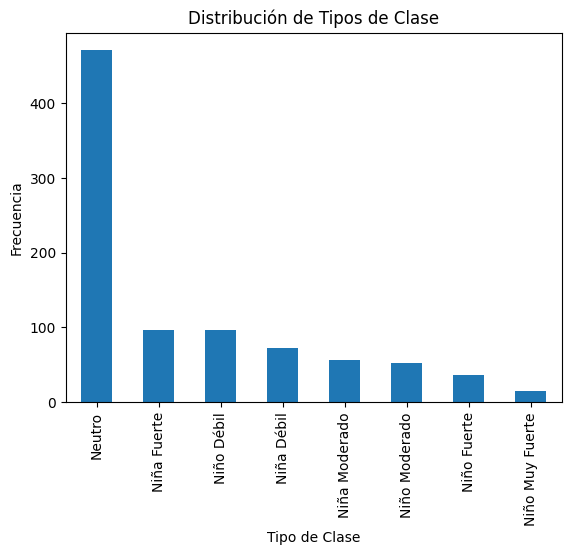

In [9]:
import matplotlib.pyplot as plt

# Contar el número de cada tipo de clase
conteo_clases = df['Indice ICEN'].value_counts()

# Crear un gráfico de barras
conteo_clases.plot(kind='bar')
plt.title('Distribución de Tipos de Clase')
plt.xlabel('Tipo de Clase')
plt.ylabel('Frecuencia')
plt.show()


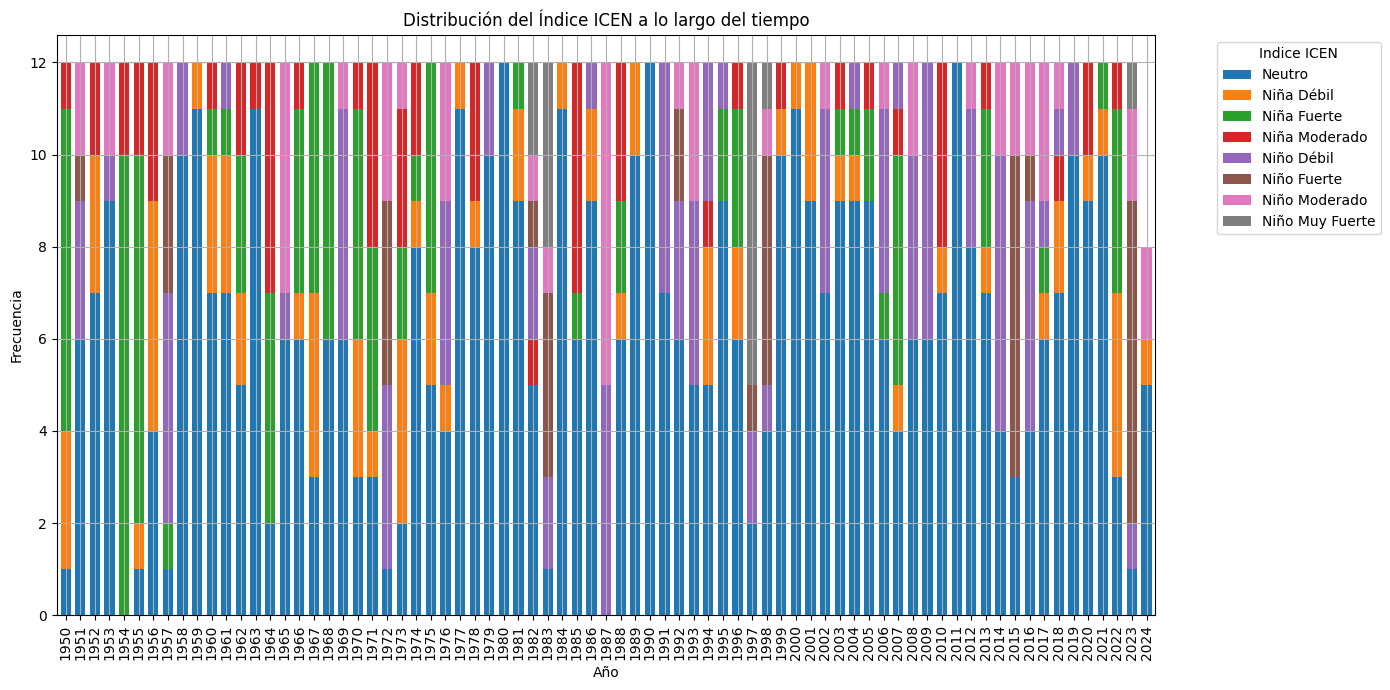

In [45]:
import pandas as pd

df['Fecha'] = pd.to_datetime(df['Fecha'])

# Extraer el año de la fecha
df['Año'] = df['Fecha'].dt.year

# Contar la frecuencia de cada categoría por año
df_counts = df.groupby(['Año', 'Indice ICEN']).size().unstack(fill_value=0)

# Crear el gráfico de barras apiladas
ax = df_counts.plot(kind='bar', stacked=True, figsize=(14, 7), width=0.7)

# Ajustar la leyenda para que esté fuera del gráfico
ax.legend(title='Indice ICEN', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribución del Índice ICEN a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()  # Ajustar el diseño para que todo se vea bien
plt.show()


# Preparacion de los datos

In [10]:
import numpy as np
def load_and_preprocess_image(img_path):
    img = Image.open(img_path).convert('RGB')
    img = img.resize((150, 150))
    img_array = np.array(img) / 255.0
    return img_array

In [11]:
images = []
labels = []

In [12]:
for index, row in df.iterrows():
    img_file = os.path.join(img_path, f"{row['Fecha'].strftime('%Y-%m')}.png")
    if os.path.exists(img_file):
        images.append(load_and_preprocess_image(img_file))
        labels.append(row['Indice ICEN'])

In [13]:
X = np.array(images)
y = np.array(labels)

In [25]:
print(X.shape)
print(y.shape)
print(y)

(744, 150, 150, 3)
(744,)
['Neutro' 'Neutro' 'Niño Débil' 'Niño Débil' 'Neutro' 'Neutro' 'Neutro'
 'Neutro' 'Neutro' 'Neutro' 'Neutro' 'Neutro' 'Neutro' 'Neutro' 'Neutro'
 'Neutro' 'Neutro' 'Neutro' 'Neutro' 'Niña Débil' 'Neutro' 'Neutro'
 'Neutro' 'Neutro' 'Neutro' 'Neutro' 'Neutro' 'Niña Débil' 'Niña Débil'
 'Niña Fuerte' 'Niña Moderado' 'Niña Débil' 'Neutro' 'Neutro' 'Neutro'
 'Neutro' 'Neutro' 'Niño Débil' 'Neutro' 'Neutro' 'Neutro' 'Neutro'
 'Niña Fuerte' 'Niña Débil' 'Niña Débil' 'Niña Débil' 'Neutro' 'Neutro'
 'Neutro' 'Neutro' 'Niña Fuerte' 'Niña Fuerte' 'Niña Fuerte'
 'Niña Moderado' 'Niña Moderado' 'Neutro' 'Neutro' 'Niña Débil' 'Neutro'
 'Niña Débil' 'Neutro' 'Neutro' 'Neutro' 'Niña Moderado' 'Neutro' 'Neutro'
 'Neutro' 'Neutro' 'Neutro' 'Neutro' 'Neutro' 'Neutro' 'Neutro'
 'Niña Moderado' 'Niña Moderado' 'Niña Moderado' 'Niña Fuerte'
 'Niña Fuerte' 'Niña Fuerte' 'Niña Fuerte' 'Niña Moderado' 'Niña Fuerte'
 'Neutro' 'Niña Moderado' 'Neutro' 'Neutro' 'Neutro' 'Niño Moderado'


In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, random_state=42)
n_timesteps = 6
def create_sequences(X, y, n_timesteps):
    X_sequences = []
    y_sequences = []
    for i in range(len(X) - n_timesteps + 1):
        X_sequences.append(X[i:i + n_timesteps])
        y_sequences.append(y[i + n_timesteps - 1])
    return np.array(X_sequences), np.array(y_sequences)

X_train_seq, y_train_seq = create_sequences(X_train, y_train, n_timesteps)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, n_timesteps)


In [23]:

print(X_train_seq.shape)  
print(y_train_seq.shape)
len(le.classes_)

(553, 6, 150, 150, 3)
(553,)


8

# CREACION DEL MODELO

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, Dense, TimeDistributed

In [19]:
model = Sequential()

# Capas CNN
model.add(TimeDistributed(Conv2D(32, (3, 3), activation='relu'), input_shape=(n_timesteps, 150, 150, 3)))
model.add(TimeDistributed(MaxPooling2D((2, 2))))

model.add(TimeDistributed(Conv2D(64, (3, 3), activation='relu')))
model.add(TimeDistributed(MaxPooling2D((2, 2))))

model.add(TimeDistributed(Flatten()))

# Capas LSTM
model.add(LSTM(64, return_sequences=False))

# Capa de salida
model.add(Dense(len(le.classes_), activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_seq, y_train_seq, epochs=20,batch_size=32, validation_split=0.2)

C:\Users\yerso\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.4633 - loss: 2.1151 - val_accuracy: 0.6036 - val_loss: 1.7920
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 944ms/step - accuracy: 0.5620 - loss: 1.9294 - val_accuracy: 0.6036 - val_loss: 1.6230
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 967ms/step - accuracy: 0.5526 - loss: 1.7687 - val_accuracy: 0.6036 - val_loss: 1.5258
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 988ms/step - accuracy: 0.5533 - loss: 1.6442 - val_accuracy: 0.6036 - val_loss: 1.4732
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 975ms/step - accuracy: 0.5383 - loss: 1.6381 - val_accuracy: 0.6036 - val_loss: 1.4489
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 984ms/step - accuracy: 0.5462 - loss: 1.5401 - val_accuracy: 0.6036 - val_loss: 1.4373
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 956ms/step - accuracy: 0.5487 - loss: 1.5151 - val_accuracy: 0.6036 - val_loss: 1.4329
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 968ms/step - accuracy: 0.5385 - loss: 1.5311 - val_accurac

# Visualizacion de modelo

In [20]:
import matplotlib.pyplot as plt
def mostrar_grafico(train_accuracy, val_accuracy, train_loss, val_loss):
    # Crear una figura con dos subgráficos (una fila, dos columnas)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Gráfico de exactitud
    ax1.plot(train_accuracy, color='blue', label='Entrenamiento')
    ax1.plot(val_accuracy, color='green', label='Validación')
    ax1.set_xlabel("Época")
    ax1.set_ylabel("Exactitud")
    ax1.set_title("Exactitud del Modelo")
    ax1.legend(loc="lower right")
    ax1.grid(True)

    # Gráfico de pérdida
    ax2.plot(train_loss, color='red', label='Pérdida Entrenamiento')
    ax2.plot(val_loss, color='orange', label='Pérdida Validación')
    ax2.set_xlabel("Época")
    ax2.set_ylabel("Pérdida")
    ax2.set_title("Pérdida del Modelo")
    ax2.legend(loc="upper right")
    ax2.grid(True)

    # Ajustar el espacio entre los subgráficos
    plt.tight_layout()

    # Mostrar los gráficos
    plt.show()

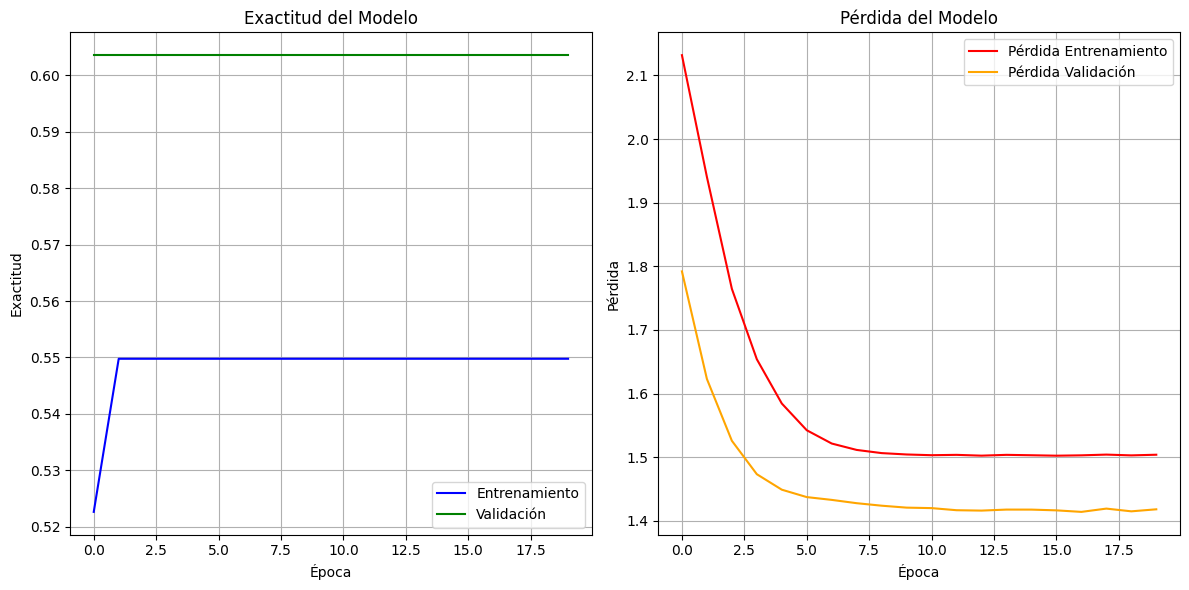

In [21]:
mostrar_grafico(history.history["accuracy"], history.history['val_accuracy'], history.history["loss"],  history.history['val_loss'])

In [ ]:
import gc
gc.collect()
exit()
